In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('population.csv')
df

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050,0.23,3711367,-512347,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322
5,2025,0.92,13001447,-464081,30.0,2.24,486,37.6,542742539,17.66,8184437460,2,1445011620
6,2020,1.04,13970396,-532687,28.4,2.24,464,35.0,483098640,17.70,7794798739,2,1380004385
7,2019,1.02,13775474,-532687,27.1,2.36,460,34.5,471828295,17.71,7713468100,2,1366417754
8,2018,1.04,13965495,-532687,27.1,2.36,455,34.1,460779764,17.73,7631091040,2,1352642280
9,2017,1.07,14159536,-532687,27.1,2.36,450,33.6,449963381,17.74,7547858925,2,1338676785


In [3]:
X = df.iloc[:, 8].values
y = df.iloc[:, -1].values

In [4]:
df_selected = pd.DataFrame({'Urban Population': X, 'Indian Population': y})

<Axes: >

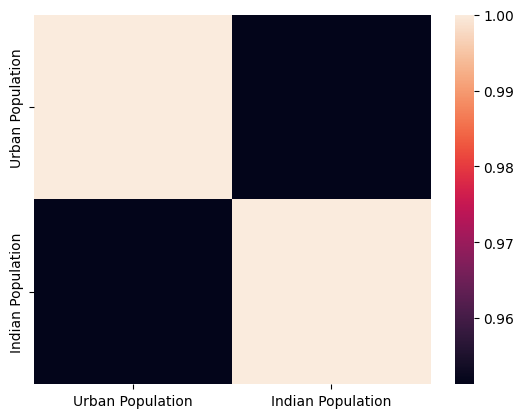

In [5]:
sns.heatmap(df_selected.corr())

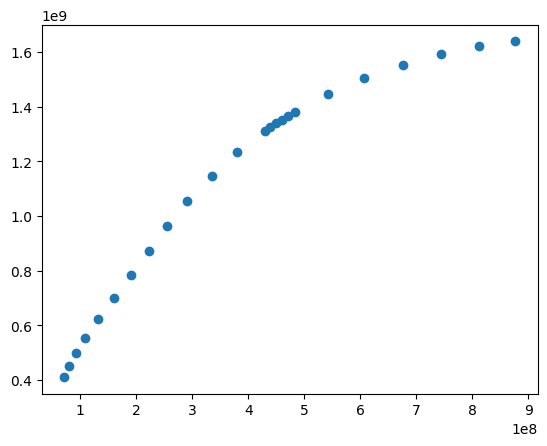

In [6]:
plt.scatter(X, y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([1.17450647e+09, 1.19051424e+09, 6.34045615e+08, 9.60931073e+08,
       6.78744780e+08])

In [10]:
# Calculating the Coefficients
print(regressor.coef_)
m = regressor.coef_[0]
m

[1.55080362]


1.550803622639076

In [11]:
# Calculating the Intercept
print(regressor.intercept_)
c = regressor.intercept_

509103999.90349305


In [12]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8623491384834105

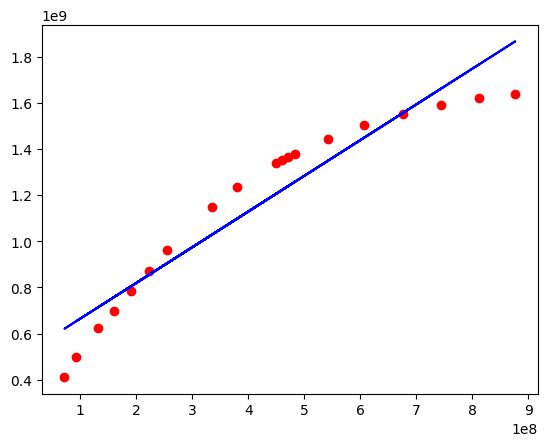

In [13]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

In [14]:
X1 = df.drop('Year', axis=1).values
y1 = df.iloc[:, 0].values
X1

array([[ 2.30000000e-01,  3.71136700e+06, -5.12347000e+05,
         3.81000000e+01,  2.24000000e+00,  5.51000000e+02,
         5.35000000e+01,  8.76613025e+08,  1.68400000e+01,
         9.73503399e+09,  1.00000000e+00,  1.63917603e+09],
       [ 3.50000000e-01,  5.58553700e+06, -4.14772000e+05,
         3.66000000e+01,  2.24000000e+00,  5.45000000e+02,
         5.01000000e+01,  8.11749463e+08,  1.70900000e+01,
         9.48180327e+09,  1.00000000e+00,  1.62061920e+09],
       [ 5.00000000e-01,  7.79354100e+06, -4.15736000e+05,
         3.50000000e+01,  2.24000000e+00,  5.36000000e+02,
         4.67000000e+01,  7.44380367e+08,  1.73100000e+01,
         9.19884724e+09,  1.00000000e+00,  1.59269151e+09],
       [ 6.60000000e-01,  1.00162980e+07, -4.15732000e+05,
         3.33000000e+01,  2.24000000e+00,  5.23000000e+02,
         4.35000000e+01,  6.75456367e+08,  1.74800000e+01,
         8.88752421e+09,  1.00000000e+00,  1.55372381e+09],
       [ 8.00000000e-01,  1.17261400e+07, -4.4012400

<Axes: >

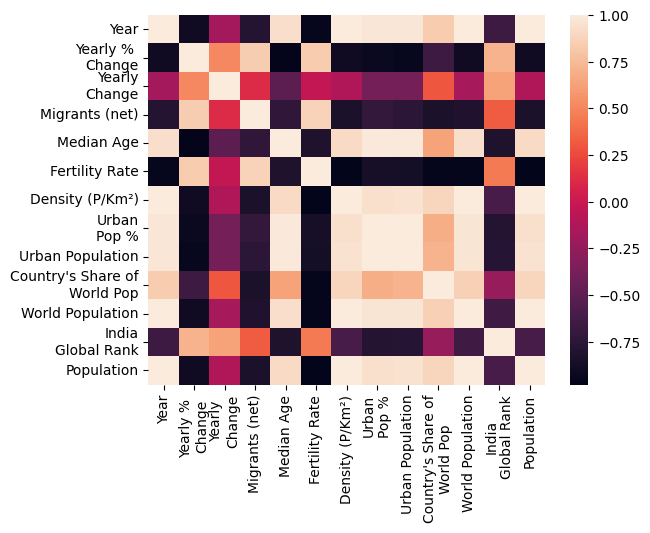

In [15]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(df.corr())

In [16]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X1[:, 3] = labelencoder.fit_transform(X1[:, 3])
X1

array([[ 2.30000000e-01,  3.71136700e+06, -5.12347000e+05,
         1.90000000e+01,  2.24000000e+00,  5.51000000e+02,
         5.35000000e+01,  8.76613025e+08,  1.68400000e+01,
         9.73503399e+09,  1.00000000e+00,  1.63917603e+09],
       [ 3.50000000e-01,  5.58553700e+06, -4.14772000e+05,
         1.80000000e+01,  2.24000000e+00,  5.45000000e+02,
         5.01000000e+01,  8.11749463e+08,  1.70900000e+01,
         9.48180327e+09,  1.00000000e+00,  1.62061920e+09],
       [ 5.00000000e-01,  7.79354100e+06, -4.15736000e+05,
         1.70000000e+01,  2.24000000e+00,  5.36000000e+02,
         4.67000000e+01,  7.44380367e+08,  1.73100000e+01,
         9.19884724e+09,  1.00000000e+00,  1.59269151e+09],
       [ 6.60000000e-01,  1.00162980e+07, -4.15732000e+05,
         1.60000000e+01,  2.24000000e+00,  5.23000000e+02,
         4.35000000e+01,  6.75456367e+08,  1.74800000e+01,
         8.88752421e+09,  1.00000000e+00,  1.55372381e+09],
       [ 8.00000000e-01,  1.17261400e+07, -4.4012400

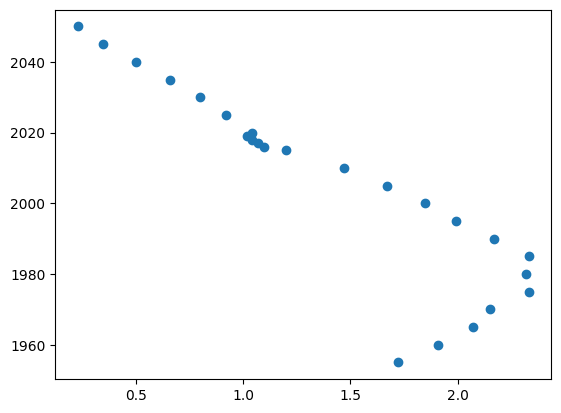

In [17]:
plt.scatter(X1[:, 0], y1)

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [19]:
X_test

array([[ 1.20000000e+00,  1.51742470e+07, -4.70015000e+05,
         1.10000000e+01,  2.40000000e+00,  4.41000000e+02,
         3.27000000e+01,  4.29069459e+08,  1.77500000e+01,
         7.37979714e+09,  2.00000000e+00,  1.31015240e+09],
       [ 1.10000000e+00,  1.43648460e+07, -5.32687000e+05,
         1.20000000e+01,  2.36000000e+00,  4.45000000e+02,
         3.32000000e+01,  4.39391699e+08,  1.77500000e+01,
         7.46402205e+09,  2.00000000e+00,  1.32451725e+09],
       [ 1.91000000e+00,  8.13341700e+06, -3.08050000e+04,
         3.00000000e+00,  5.90000000e+00,  1.52000000e+02,
         1.79000000e+01,  8.05657230e+07,  1.48500000e+01,
         3.03494975e+09,  2.00000000e+00,  4.50547679e+08],
       [ 1.85000000e+00,  1.85305920e+07, -1.36514000e+05,
         8.00000000e+00,  3.48000000e+00,  3.55000000e+02,
         2.76000000e+01,  2.91350282e+08,  1.72000000e+01,
         6.14349382e+09,  2.00000000e+00,  1.05657555e+09],
       [ 2.15000000e+00,  1.12132940e+07, -6.8569000

In [20]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([2015.64279927, 2015.82546933, 1959.89679457, 2000.08846127,
       1970.24487393])

In [22]:
# Calculating the Coefficients
print(regressor.coef_)

[ 3.48497704e+00 -6.41295237e-08  6.21704068e-07 -7.31461505e-01
 -4.19935226e+00  1.98131023e-02 -8.96375327e-01  9.58266914e-08
  3.61778353e+00  1.99425285e-08  1.25645523e-01 -8.48012159e-08]


In [23]:
# Calculating the Coefficients
print(regressor.coef_)

[ 3.48497704e+00 -6.41295237e-08  6.21704068e-07 -7.31461505e-01
 -4.19935226e+00  1.98131023e-02 -8.96375327e-01  9.58266914e-08
  3.61778353e+00  1.99425285e-08  1.25645523e-01 -8.48012159e-08]


In [24]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9998049567208844

In [25]:
X2 = df['Migrants (net)'].values
y2 = df['Year'].values

In [26]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# Reshape X2 to a 2D array
X2 = X2.reshape(-1, 1)

# Create a regressor object
regressor = DecisionTreeRegressor(max_depth=3, random_state=0)

# Fit the regressor with X2 and y2 data
regressor.fit(X2, y2)

DecisionTreeRegressor(max_depth=3, random_state=0)

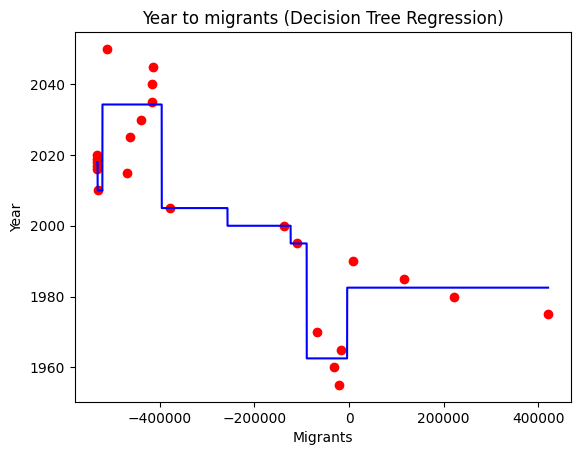

In [27]:
# arange for creating a range of values from min value of X to max value of X
# with a difference of 0.01 between two consecutive values
X_grid = np.arange(min(X2), max(X2), 0.01)

# reshape for reshaping the data into a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1))

# scatter plot for original data
plt.scatter(X2, y2, color='red')

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color='blue')

# specify title
plt.title('Year to migrants (Decision Tree Regression)')

# specify X axis label
plt.xlabel('Migrants')

# specify Y axis label
plt.ylabel('Year')

# show the plot
plt.show()

[Text(0.5, 0.875, '[-512347] <= -257155.5\nsquared_error = 724.167\nsamples = 24\nvalue = 2005.0'),
 Text(0.25, 0.625, '[-512347] <= -521758.0\nsquared_error = 168.087\nsamples = 14\nvalue = 2024.643'),
 Text(0.125, 0.375, '[-512347] <= -531928.0\nsquared_error = 10.556\nsamples = 6\nvalue = 2016.667'),
 Text(0.0625, 0.125, 'squared_error = 2.0\nsamples = 5\nvalue = 2018.0'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 2010.0'),
 Text(0.375, 0.375, '[-512347] <= -396284.5\nsquared_error = 202.734\nsamples = 8\nvalue = 2030.625'),
 Text(0.3125, 0.125, 'squared_error = 124.49\nsamples = 7\nvalue = 2034.286'),
 Text(0.4375, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 2005.0'),
 Text(0.75, 0.625, '[-512347] <= -89579.5\nsquared_error = 206.25\nsamples = 10\nvalue = 1977.5'),
 Text(0.625, 0.375, '[-512347] <= -123552.0\nsquared_error = 6.25\nsamples = 2\nvalue = 1997.5'),
 Text(0.5625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 2000.0'),
 Text(0.6875, 0.125,

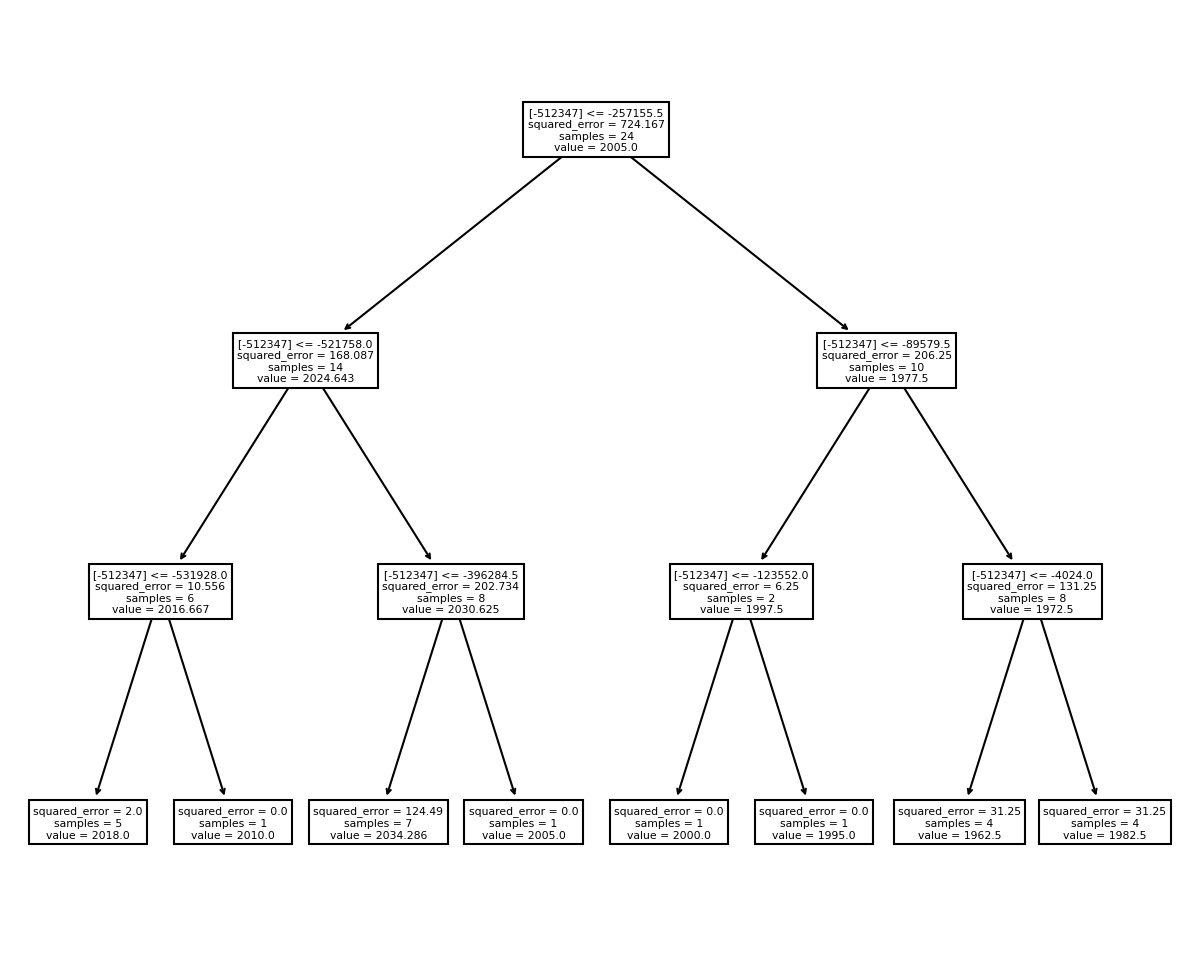

In [28]:
# import export_graphviz
from sklearn.tree import export_graphviz, plot_tree

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot', feature_names =['Production Cost'])

# The tree is finally exported and shown in the TREE STRUCTURE below,
# visualized using http://www.webgraphviz.com/ by copying the data from the ‘tree.dot’ file.
plt.figure(figsize=(10,8), dpi=150)
plot_tree(regressor, feature_names=X2)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X2 and y2 are your features and target for logistic regression
X2 = df['Migrants (net)'].values.reshape(-1, 1)
y2 = df['Year'].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred_logreg = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred_logreg)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
classification_rep = classification_report(y_test, y_pred_logreg)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.0
Confusion Matrix:
[[0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

        1960       0.00      0.00      0.00       1.0
        1970       0.00      0.00      0.00       1.0
        2000       0.00      0.00      0.00       1.0
        2015       0.00      0.00      0.00       1.0
        2016       0.00      0.00      0.00       1.0
        2018       0.00      0.00      0.00       0.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming X2 and y2 are your features and target for classification
X2 = df['Migrants (net)'].values.reshape(-1, 1)
y2 = df['Year'].values

# Convert 'Year' to binary labels (you might need to adjust this based on your actual problem)
y2_binary = (y2 > y2.mean()).astype(int)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X2, y2_binary, test_size=0.2, random_state=0)

# Initialize the Decision Tree Classifier model
classifier = DecisionTreeClassifier(max_depth=3, random_state=0)

# Fit the model on the training data
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_classifier = classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_classifier)
conf_matrix = confusion_matrix(y_test, y_pred_classifier)
classification_rep = classification_report(y_test, y_pred_classifier)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[3 0]
 [0 2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

